In [127]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import scipy.stats as sts
import os
from collections import Counter
import requests
import json
import time
from pprint import pprint


# Google API Key
#from api_keys import gkey
from housing import weather_api_key

In [97]:
city_data=pd.read_csv('output_data/housing_price.csv')
city_data.head()

,RegionName,StateName,SizeRank,2015,2016,2017,2018,2019
0,New York,New York,1,517833.333333,534275.000000,542425.000000,555416.666667,565016.666667
1,Los Angeles,California,2,491658.333333,530025.000000,567958.333333,637291.666667,704691.666667
2,Houston,Texas,3,171058.333333,181208.333333,190675.000000,196850.000000,208958.333333
3,Chicago,Illinois,4,236341.666667,218975.000000,228258.333333,245083.333333,265641.666667
4,San Antonio,Texas,5,164600.000000,171308.333333,177666.666667,188108.333333,197250.000000


In [99]:
chosen_idx = np.random.choice(3158, replace = False, size = 600)

try:
    city_data = city_data.iloc[chosen_idx]
except IndexError:
    print("Missing Value")

city_data.reset_index(inplace=True)
city_data.head()


,index,RegionName,StateName,SizeRank,2015,2016,2017,2018,2019
0,2747,Flossmoor,Illinois,3225,185900.000000,172658.333333,184808.333333,192683.333333,204508.333333
1,76,Newark,New Jersey,77,0.000000,95791.666667,169991.666667,201183.333333,241200.000000
2,2105,Spring Township,Pennsylvania,2397,174983.333333,182116.666667,194083.333333,203766.666667,201075.000000
3,2125,Byron,Georgia,2421,131258.333333,131633.333333,135216.666667,144525.000000,155266.666667
4,1489,Rosenberg,Texas,1648,144066.666667,161191.666667,173433.333333,181858.333333,183108.333333


In [102]:
city_data=city_data[["RegionName","StateName","SizeRank","2015","2016","2017","2018","2019"]]
city_data.head()

,RegionName,StateName,SizeRank,2015,2016,2017,2018,2019
0,Flossmoor,Illinois,3225,185900.000000,172658.333333,184808.333333,192683.333333,204508.333333
1,Newark,New Jersey,77,0.000000,95791.666667,169991.666667,201183.333333,241200.000000
2,Spring Township,Pennsylvania,2397,174983.333333,182116.666667,194083.333333,203766.666667,201075.000000
3,Byron,Georgia,2421,131258.333333,131633.333333,135216.666667,144525.000000,155266.666667
4,Rosenberg,Texas,1648,144066.666667,161191.666667,173433.333333,181858.333333,183108.333333


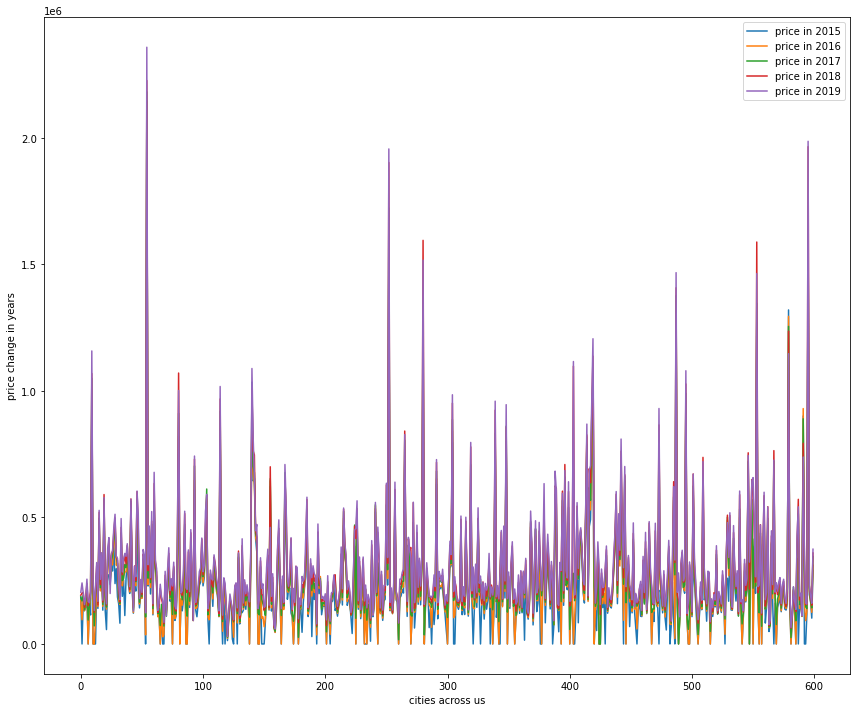

In [147]:
x_data=np.arange(0,len(city_data["RegionName"]),1)

plt.figure(figsize=(12,10))
plt.plot(x_data,city_data["2015"],label="price in 2015")
plt.plot(x_data,city_data["2016"],label="price in 2016")
plt.plot(x_data,city_data["2017"],label="price in 2017")
plt.plot(x_data,city_data["2018"],label="price in 2018")
plt.plot(x_data,city_data["2019"],label="price in 2019")
plt.ylabel("price change in years")
plt.xlabel("cities across us")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

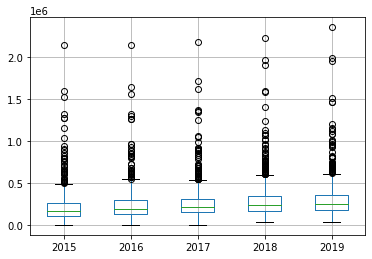

In [148]:
city_data.boxplot(column=["2015","2016","2017","2018","2019"])
plt.show()

In [119]:
base_url="http://api.openweathermap.org/data/2.5/weather" 

city_name=[]
city_cloudiness=[]
city_temp=[]



for index, row in city_data.iterrows(): 
    try:
        parameters={"q":row["RegionName"],"units":"imperial","appid":weather_api_key}
        repo=requests.get(base_url,params=parameters).json() 
    
        name=repo["name"]
        temp=repo["main"]["temp"]
        cloudiness=repo["clouds"]["all"]
        
        city_name.append(name)
        city_temp.append(temp)
        city_cloudiness.append(cloudiness)
     
    except KeyError:
        
        print("Missing Data")

Missing Data
Missing Data
Missing Data
Missing Data
Missing Data
Missing Data
Missing Data
Missing Data
Missing Data
Missing Data
Missing Data
Missing Data
Missing Data
Missing Data
Missing Data
Missing Data
Missing Data
Missing Data


In [151]:
weather_data=pd.DataFrame({"RegionName":city_name,"cloudiness(%)":city_cloudiness,"temperature":city_temp})
weather_data.head()

,RegionName,cloudiness(%),temperature
0,Flossmoor,40,70.09
1,Newark,40,69.44
2,Byron,1,46.40
3,Ružomberok,100,49.15
4,Bedford,99,54.59


In [153]:
combined=pd.merge(city_data,weather_data,on="RegionName")
combined.head()

,RegionName,StateName,SizeRank,2015,2016,2017,2018,2019,cloudiness(%),temperature
0,Flossmoor,Illinois,3225,185900.000000,172658.333333,184808.333333,192683.333333,204508.333333,40,70.09
1,Newark,New Jersey,77,0.000000,95791.666667,169991.666667,201183.333333,241200.000000,40,69.44
2,Byron,Georgia,2421,131258.333333,131633.333333,135216.666667,144525.000000,155266.666667,1,46.40
3,Bedford,Texas,990,186700.000000,208383.333333,229100.000000,238950.000000,256075.000000,99,54.59
4,Haltom City,Texas,1092,0.000000,0.000000,94383.333333,151116.666667,168116.666667,0,75.60


In [ ]:
for i in range(2015, 2018):
    combined[f'{i}']=((combied[[f'{i}-01',f'{i}-02',f'{i}-03',f'{i}-01',
                                      f'{i}-05',f'{i}-06',f'{i}-07',f'{i}-08',
                                     f'{i}-09',f'{i}-10',f'{i}-11',f'{i}-12']].sum(axis=1))/12)

In [ ]:
#combined.plot(kind="scatter",x=)